In [2]:
!pip install filterpy


  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=b7df8c359e2ef81a7fbe50e7b2a8dbf6b3c747f5fcc9f00574b00dcccea03314
  Stored in directory: c:\users\zhuanz\appdata\local\pip\cache\wheels\53\e6\de\a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy


In [3]:
import numpy as np
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise

In [ ]:
def state_transition(x, dt):
    F = np.array([[1, dt, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, dt],
                 [0, 0, 0, 1]])
    return np.dot(F, x)

"""
对输入状态向量进行观测变换的函数
参数:
    x: 输入的状态向量
返回:
    经过观测矩阵变换后的状态向量
"""
def observation(x):
    H = np.array([[1, 0, 0, 0],
                 [0, 0, 1, 0]])
    return H.dot(x)

In [15]:
dt = 1.0  # 时间步长
x = np.array([[0],  # 位置
              [0],  # 速度
              [0],  # 加速度
              [0]]) # 角速度

# 定义Sigma点
points = MerweScaledSigmaPoints(n=4, alpha=.1, beta=2., kappa=-1)

# 初始化UKF
ukf = UnscentedKalmanFilter(dim_x=4, dim_z=2, dt=dt, hx=observation, fx=state_transition, points=points)
ukf.x = x  # 初始状态
ukf.x = np.squeeze(ukf.x)
ukf.P *= 100  # 初始协方差矩阵
ukf.R = np.array([[.1, 0], [0, .1]])  # 观测噪声协方差
ukf.Q = Q_discrete_white_noise(dim=4, dt=dt, var=.01)  # 过程噪声协方差

In [1]:
obs = observation(actual_state)
print(f"Observation shape: {obs.shape}")
measurement = obs + np.sqrt(actual_MeasurementNoise) * np.random.normal(size=obs.shape)


NameError: name 'observation' is not defined

Time: 1, State: [0.43366277 0.21683138 0.64385783 0.32192891], Measurement: [0.4338796  0.64417976]
Time: 2, State: [0.46948746 0.03636299 1.05691061 0.41276859], Measurement: [0.46912705 1.05709199]
Time: 3, State: [0.45361296 0.00225865 0.90580958 0.07488063], Measurement: [0.44626887 0.80296964]
Time: 4, State: [ 0.31175863 -0.06205169  0.87308574  0.02696237], Measurement: [0.25348146 0.83751729]
Time: 5, State: [ 0.43553438 -0.0057213   0.66111515 -0.05971095], Measurement: [0.5690774  0.53016443]
Time: 6, State: [ 0.14355362 -0.09511632  0.48529773 -0.10577026], Measurement: [-0.09004389  0.44757249]
Time: 7, State: [ 0.04858384 -0.1232563  -0.04727272 -0.24605842], Measurement: [ 0.12738291 -0.3337466 ]
Time: 8, State: [-0.20476733 -0.13986368 -0.12411451 -0.19685561], Measurement: [-0.4160568   0.03192679]
Time: 9, State: [-0.32384871 -0.13631047 -0.32994498 -0.1987155 ], Measurement: [-0.2898328  -0.34396342]
Time: 10, State: [-0.4755227  -0.12073568 -0.33413156 -0.13743228], 

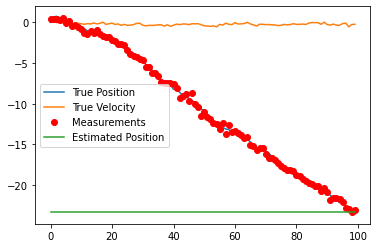

In [19]:
import matplotlib.pyplot as plt

# 真实状态和观测值生成
true_states = []
measurements = []
actual_MeasurementNoise = 0.1
actual_ProcessNoise = 0.01

for t in range(100):
    actual_state = state_transition(ukf.x, dt) + np.sqrt(actual_ProcessNoise) * np.random.normal(size=4)
    measurement = observation(actual_state) + np.sqrt(actual_MeasurementNoise) * np.random.normal(size=(2,))

    
    true_states.append(actual_state.copy())
    measurements.append(measurement.copy())
    
    ukf.predict()
    ukf.update(measurement)
    
    print(f"Time: {t+1}, State: {ukf.x}, Measurement: {measurement}")

# 绘制结果
plt.plot(np.arange(100), [s[0] for s in true_states], label='True Position')
plt.plot(np.arange(100), [s[1] for s in true_states], label='True Velocity')
plt.plot(np.arange(100), [s[0] for s in measurements], 'ro', label='Measurements')
plt.plot(np.arange(100), [ukf.x[0] for _ in range(100)], label='Estimated Position')
plt.legend()
plt.show()

关于使用无迹卡尔曼滤波器（UKF）进行仿真分析，以下是一些关键步骤和要点，结合了搜索结果中的信息：

### 1. 理解UKF的基本原理
无迹卡尔曼滤波器（UKF）是一种用于处理非线性系统的贝叶斯滤波器近似方法。它通过无迹变换（Unscented Transform）来处理概率密度均值和协方差的非线性传递问题。相比于扩展卡尔曼滤波（EKF），UKF从概率密度函数的角度对非线性系统进行近似，通常能够提供更高的精度。

### 2. UKF的关键组件
在MATLAB中实现UKF算法，需要掌握以下几个关键函数和模块：
- **Sigma Points**：生成Sigma点，这些点用于捕捉先验分布的均值和协方差。
- **Predict**：状态预测和协方差预测。
- **Update**：滤波更新，结合实际测量数据调整状态估计。

### 3. 算法参数的初始化和配置
初始化状态估计值和协方差矩阵，同时定义系统过程和测量函数。例如：
```matlab
params.StateDim = 4;
params.MeasDim = 2;
params.SigmaPointsNum = 2*params.StateDim + 1;
params.Wm = ones(1, params.SigmaPointsNum) / params.SigmaPointsNum;
params.Wc = ones(1, params.SigmaPointsNum) / params.SigmaPointsNum;
params.Wc(1) = params.Wc(1) + (params.StateDim + lambda);
```
这里`lambda`是一个扩展因子，用于调整Sigma点的分布。

### 4. 仿真案例分析
选择一个典型的应用场景，如自动驾驶汽车的定位问题，状态变量可能包括位置、速度和加速度等。在MATLAB中进行UKF仿真的步骤大致如下：
1. 初始化参数和仿真环境。
2. 生成初始Sigma点集合。
3. 执行时间更新，预测下一个时间点的状态和协方差。
4. 执行测量更新，结合实际测量数据调整状态估计。
5. 输出估计结果，进行性能评估。

### 5. 实际仿真代码示例
以下是一个简化的UKF仿真代码示例，展示了UKF在MATLAB中的应用：
```matlab
% 定义系统方程和噪声参数
F = [1, T, 0, 0; 0, 1, 0, 0; 0, 0, 1, T; 0, 0, 0, 1];
Q = delta_w * diag([0.5, 1]);
G = [T^2/2, 0; T, 0; 0, T^2/2; 0, T];
R = 5; % 观测噪声

% 初始化状态和观测
X = zeros(4, N);
Z = zeros(1, N);
X(:, 1) = [-100, 2, 200, 20];
v = sqrtm(R) * randn(1, N);

% 真实状态和观测值生成
for t = 2:N
    X(:, t) = F * X(:, t-1) + G * sqrtm(Q) * randn(2, 1);
end
for t = 1:N
    Z(t) = Dist(X(:, t), Xstation) + v(t);
end

% UKF滤波
L = 4;
alpha = 1;
kalpha = 0;
belta = 2;
ramda = 3 - L;
Wm = ones(1, 2*L+1) / (2*(L+ramda));
Wc = ones(1, 2*L+1) / (2*(L+ramda));
Wm(1) = ramda / (L + ramda);
Wc(1) = ramda / (L + ramda) + 1 - alpha^2 + belta;

Xukf = zeros(4, N);
Xukf(:, 1) = X(:, 1);
P0 = eye(4);
for t = 2:N
    % UKF算法的详细步骤...
end
```
这段代码展示了如何在MATLAB中设置UKF的基本框架，包括系统方程的定义、噪声参数的设置、状态和观测值的初始化以及UKF滤波过程的简化示例。

通过这些步骤和代码示例，您可以开始在MATLAB中实现和分析UKF算法，以解决具体的非线性系统估计问题。


根据搜索结果，我们可以对无迹卡尔曼滤波器（UKF）和扩展卡尔曼滤波器（EKF）的性能进行比较，并分析它们在不同情况下的优势和局限性。

### UKF在什么情况下比EKF好

1. **高度非线性系统**：UKF通过无迹变换（Unscented Transform）使用Sigma点来近似非线性变换后的概率分布，这使得它在处理高度非线性系统时比EKF更加准确。EKF通过雅可比矩阵线性化非线性模型，这在高度非线性系统中可能不够准确，因为它忽略了高阶项。

2. **不需要计算雅可比矩阵**：UKF不需要计算雅可比矩阵，这在某些复杂的非线性系统中是一个显著优势，因为计算雅可比矩阵可能比较复杂或不可行。

3. **更好的跟踪精度**：在非线性严重或者高阶误差引入的情况下，UKF算法相对于EKF具有较好的跟踪精度。

### UKF在什么情况下性能不如EKF

1. **计算复杂度**：UKF的计算复杂度较高，因为它需要处理多个Sigma点，这在某些高维问题中可能效率较低。相比之下，EKF的计算复杂度较低，适合实时应用。

2. **实现复杂度**：虽然UKF不需要计算雅可比矩阵，但它需要生成和处理Sigma点，逻辑上更复杂。

### 分析原因

- **非线性处理能力**：UKF在处理非线性系统时更加准确，因为它避免了对系统进行线性化，而EKF的线性化可能不准确，尤其是在高度非线性的系统中。

- **高阶项的影响**：EKF在线性化过程中忽略了高阶项，这在强非线性系统中会导致较大的误差。

- **Sigma点的权重和选择**：UKF通过选择合适的Sigma点和它们的权重来近似非线性变换后的概率分布，这通常能提供比EKF更精确的结果。

- **适用场景**：EKF适用于弱非线性系统，计算资源有限的情况；而UKF适用于系统非线性程度高，需要高精度估计的场景。

综上所述，选择UKF还是EKF应根据系统的非线性程度、观测的噪声特性以及计算资源的可用性来决定。
